In [ ]:
## Machine Learinng: Fairness of Measuring Happiness
### Yi Lin

In [47]:
#Import Data and Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('/Users/Ellina/Desktop/DS552/HW/HW4/chirper-happiness.csv')

In [48]:
df.head(10)

,Id2,totalGroup1,totalGroup2,percent_bachelorPlus,meanvalence,households_meanIncome
0,6037101110,1244,2319,19.4,5.863903,68938
1,6037101122,304,2175,27.2,5.963174,120490
2,6037101210,2434,2078,16.6,5.623312,54481
3,6037101220,509,1370,19.8,5.687386,51880
4,6037101300,365,3116,31.0,5.687331,90933
5,6037101400,739,2379,27.7,5.812804,75420
6,6037102103,322,1238,38.1,5.901085,76097
7,6037102104,454,2092,43.9,5.859435,90206
8,6037102105,1088,381,16.1,5.793754,67755
9,6037102107,833,1866,28.7,5.869520,80267


In [49]:
df.describe()

,Id2,totalGroup1,totalGroup2,percent_bachelorPlus,meanvalence,households_meanIncome
count,2.110000e+03,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000
mean,6.037379e+09,1607.534597,988.572038,28.824028,5.828721,78324.632227
std,2.057889e+05,1097.976544,995.119185,20.642709,0.113931,43137.269798
min,6.037101e+09,16.000000,1.000000,0.000000,5.110000,9040.000000
25%,6.037206e+09,695.750000,169.000000,11.400000,5.761016,50404.000000
50%,6.037402e+09,1450.000000,636.500000,23.500000,5.822492,67437.500000
75%,6.037541e+09,2368.750000,1587.500000,42.875000,5.889826,92943.000000
max,6.037930e+09,5976.000000,5929.000000,84.200000,6.941389,387177.000000


In [50]:
#Understand the dataset, Look through the data shape and what featues in the dataset.
print(df.shape)
print(df.columns)

(2110, 6)
Index(['Id2', 'totalGroup1', 'totalGroup2', 'percent_bachelorPlus',
       'meanvalence', 'households_meanIncome'],
      dtype='object')


In [51]:
#To check the number of Missing value
Missing_values = df.isnull().sum()
print(Missing_values)

Id2                      0
totalGroup1              0
totalGroup2              0
percent_bachelorPlus     0
meanvalence              0
households_meanIncome    0
dtype: int64


In [52]:
df = df.drop('Id2',axis=1)


In [53]:
df.head(10)

,totalGroup1,totalGroup2,percent_bachelorPlus,meanvalence,households_meanIncome
0,1244,2319,19.4,5.863903,68938
1,304,2175,27.2,5.963174,120490
2,2434,2078,16.6,5.623312,54481
3,509,1370,19.8,5.687386,51880
4,365,3116,31.0,5.687331,90933
5,739,2379,27.7,5.812804,75420
6,322,1238,38.1,5.901085,76097
7,454,2092,43.9,5.859435,90206
8,1088,381,16.1,5.793754,67755
9,833,1866,28.7,5.869520,80267


In [54]:
mean = df['meanvalence'].mean()
std = df['meanvalence'].std()
df_scaler = StandardScaler().fit_transform(df)
df_scaler = pd.DataFrame(df_scaler, columns = df.columns)
df = pd.DataFrame(df, columns = df.columns)
print('df_meanvalence:', df['meanvalence'])
print('df_scaler_meanvalence:',df_scaler['meanvalence'])
threshold = (5.8 - mean)/ std
threshold


df_meanvalence: 0       5.863903
1       5.963174
2       5.623312
3       5.687386
4       5.687331
          ...   
2105    5.877809
2106    5.888279
2107    5.713390
2108    5.820676
2109    5.811784
Name: meanvalence, Length: 2110, dtype: float64
df_scaler_meanvalence: 0       0.308874
1       1.180404
2      -1.803357
3      -1.240830
4      -1.241314
          ...   
2105    0.430958
2106    0.522876
2107   -1.012526
2108   -0.070633
2109   -0.148696
Name: meanvalence, Length: 2110, dtype: float64


-0.25209242454820824

## 1. Ground Truth Model 

In [55]:
numeric_attribute = ['meanvalence','totalGroup1', 'totalGroup2', 'percent_bachelorPlus', 'households_meanIncome']


In [56]:
#Plot correlation matrix
corr_numeric = df_scaler[numeric_attribute].corr()
corr_numeric.style.background_gradient(cmap='YlGnBu')

,meanvalence,totalGroup1,totalGroup2,percent_bachelorPlus,households_meanIncome
meanvalence,1.000000,-0.361185,0.335692,0.457267,0.311013
totalGroup1,-0.361185,1.000000,-0.503950,-0.729305,-0.507290
totalGroup2,0.335692,-0.503950,1.000000,0.726215,0.585684
percent_bachelorPlus,0.457267,-0.729305,0.726215,1.000000,0.752844
households_meanIncome,0.311013,-0.507290,0.585684,0.752844,1.000000


Text(0, 0.5, 'ground truth valence')

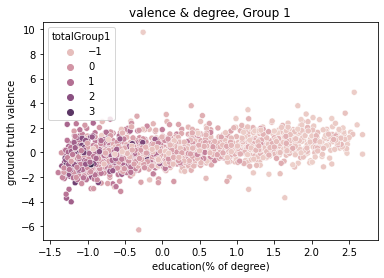

In [57]:
sns.scatterplot(x='percent_bachelorPlus', y='meanvalence', data=df_scaler,hue='totalGroup1')
plt.title('valence & degree, Group 1')
plt.xlabel('education(% of degree)')
plt.ylabel('ground truth valence')




Text(0, 0.5, 'ground truth valence')

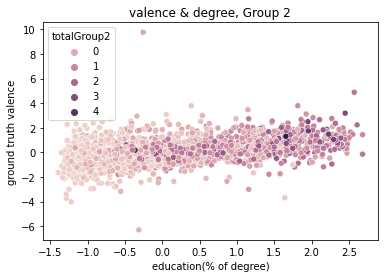

In [58]:
sns.scatterplot(x='percent_bachelorPlus', y='meanvalence', data=df_scaler, hue='totalGroup2')
plt.title('valence & degree, Group 2')
plt.xlabel('education(% of degree)')
plt.ylabel('ground truth valence')



Text(0, 0.5, 'ground truth valence')

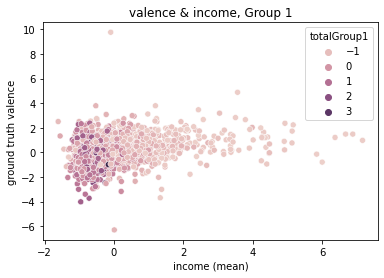

In [59]:
sns.scatterplot(x='households_meanIncome', y='meanvalence', data=df_scaler, hue='totalGroup1')
plt.title('valence & income, Group 1')
plt.xlabel('income (mean)')
plt.ylabel('ground truth valence')



Text(0, 0.5, 'ground truth valence')

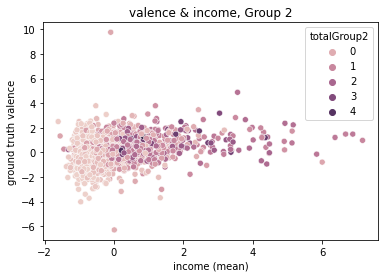

In [60]:
sns.scatterplot(x='households_meanIncome', y='meanvalence', data=df_scaler, hue='totalGroup2')
plt.title('valence & income, Group 2')
plt.xlabel('income (mean)')
plt.ylabel('ground truth valence')



## 2. Ethnic Group Aware Model (Prediction Model I)

In [61]:
X = df_scaler[['totalGroup1', 'totalGroup2', 'percent_bachelorPlus', 'households_meanIncome']]
Y = df_scaler['meanvalence']
X = sm.add_constant(X)
#model_1_mod = sm.OLS(Y, X)
#model_1 = model_1_mod.fit() 
#model_1 = model_1.
model_1 = sm.OLS(Y, X).fit()
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            meanvalence   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     142.5
Date:                Wed, 24 Mar 2021   Prob (F-statistic):          6.74e-108
Time:                        21:53:06   Log-Likelihood:                -2741.2
No. Observations:                2110   AIC:                             5492.
Df Residuals:                    2105   BIC:                             5521.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.508e-15      0.019  -2.85e-13      1.000      -0.038       0.038
totalGroup1              -0.0536      0.028     -1.885      0.060      -0.109       0.002
totalGroup2               0.0166      0.028      0.587      0.557      -0.039       0.072
percent_bachelorPlus      0.4612      0.042     10.967      0.000       0.379       0.544
households_meanIncome    -0.0730      0.030     -2.468      0.014      -0.131      -0.015
==============================================================================
Omnibus:                      471.250   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7403.553
Skew:                           0.610   Prob(JB):                         0.00
Kurtosis:                      12.095   Cond. No.                         4.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# predicted valence
valence_predict_1 = model_1.predict(X)
print(valence_predict_1)

0      -0.154761
1      -0.024323
2      -0.254923
3      -0.096888
4       0.123364
          ...   
2105    0.595508
2106    0.532600
2107    0.896757
2108    0.033935
2109   -0.227007
Length: 2110, dtype: float64


In [63]:
df_drop_meanvalence = df_scaler.drop('meanvalence',axis=1)


In [64]:
df_drop_meanvalence.head()


,totalGroup1,totalGroup2,percent_bachelorPlus,households_meanIncome
0,-0.331174,1.337270,-0.456639,-0.217651
1,-1.187497,1.192530,-0.078692,0.977701
2,0.752895,1.095031,-0.592312,-0.552870
3,-1.000745,0.383390,-0.437257,-0.613180
4,-1.131927,2.138369,0.105436,0.292354


In [65]:
#Drop ground_truth_valence, combine new predicted valence with original data
model_1_df = pd.concat([valence_predict_1, df_drop_meanvalence], axis=1)
model_1_df.columns =['valence_predict','totalGroup1', 'totalGroup2', 'percent_bachelorPlus', 'households_meanIncome']
model_1_df


,valence_predict,totalGroup1,totalGroup2,percent_bachelorPlus,households_meanIncome
0,-0.154761,-0.331174,1.337270,-0.456639,-0.217651
1,-0.024323,-1.187497,1.192530,-0.078692,0.977701
2,-0.254923,0.752895,1.095031,-0.592312,-0.552870
3,-0.096888,-1.000745,0.383390,-0.437257,-0.613180
4,0.123364,-1.131927,2.138369,0.105436,0.292354
...,...,...,...,...,...
2105,0.595508,-0.792131,1.748374,1.500933,2.300908
2106,0.532600,-0.728362,2.390660,1.292577,1.945841
2107,0.896757,-1.439839,-0.895152,1.748052,-0.388309
2108,0.033935,-1.357850,-0.752422,0.086054,0.903479


In [66]:
#Plot correlation matrix
numeric_attribute = ['valence_predict','totalGroup1', 'totalGroup2', 'percent_bachelorPlus', 'households_meanIncome']

corr_numeric = model_1_df[numeric_attribute].corr()
corr_numeric.style.background_gradient(cmap='YlGnBu')


,valence_predict,totalGroup1,totalGroup2,percent_bachelorPlus,households_meanIncome
valence_predict,1.000000,-0.782482,0.727253,0.990636,0.673788
totalGroup1,-0.782482,1.000000,-0.503950,-0.729305,-0.507290
totalGroup2,0.727253,-0.503950,1.000000,0.726215,0.585684
percent_bachelorPlus,0.990636,-0.729305,0.726215,1.000000,0.752844
households_meanIncome,0.673788,-0.507290,0.585684,0.752844,1.000000


In [67]:
mean = df['meanvalence'].mean()
std = df['meanvalence'].std()

threshold = (5.8 - mean)/ std
threshold

-0.25209242454820824

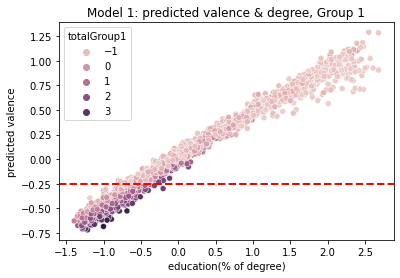

In [68]:
sns.scatterplot(x='percent_bachelorPlus', y='valence_predict', data=model_1_df, hue='totalGroup1')
plt.title('Model 1: predicted valence & degree, Group 1')
plt.xlabel('education(% of degree)')
plt.ylabel('predicted valence')
plt.axhline(y= threshold, color='r', linestyle='--', lw=2)



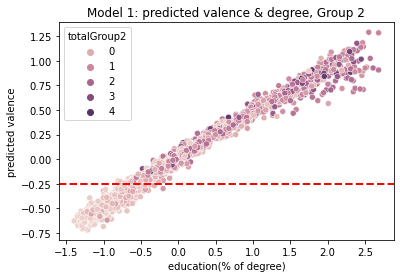

In [69]:
sns.scatterplot(x='percent_bachelorPlus', y='valence_predict', data=model_1_df, hue='totalGroup2')
plt.title('Model 1: predicted valence & degree, Group 2')
plt.xlabel('education(% of degree)')
plt.ylabel('predicted valence')
plt.axhline(y= threshold, color='r', linestyle='--', lw=2)


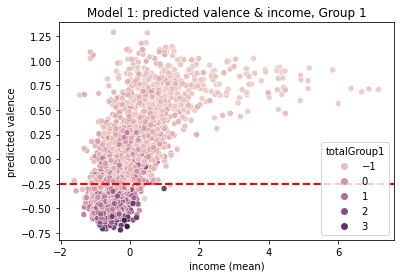

In [70]:
sns.scatterplot(x='households_meanIncome', y='valence_predict', data=model_1_df, hue='totalGroup1')
plt.title('Model 1: predicted valence & income, Group 1')
plt.xlabel('income (mean)')
plt.ylabel('predicted valence')
plt.axhline(y= threshold, color='r', linestyle='--', lw=2)


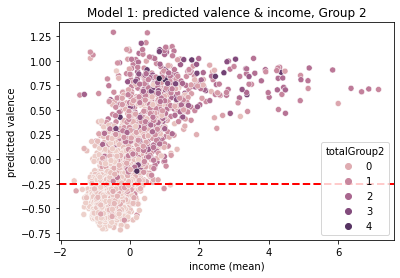

In [71]:
sns.scatterplot(x='households_meanIncome', y='valence_predict', data=model_1_df, hue='totalGroup2')
plt.title('Model 1: predicted valence & income, Group 2')
plt.xlabel('income (mean)')
plt.ylabel('predicted valence')
plt.axhline(y= threshold, color='r', linestyle='--', lw=2)



## 3. Ethnic Group Blind Model (Prediction Model II)

In [72]:
X = df_scaler[['percent_bachelorPlus', 'households_meanIncome']]
Y = df_scaler['meanvalence']
X = sm.add_constant(X)
 
model_2 = sm.OLS(Y, X).fit()
model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            meanvalence   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     282.8
Date:                Wed, 24 Mar 2021   Prob (F-statistic):          1.58e-109
Time:                        21:53:08   Log-Likelihood:                -2743.1
No. Observations:                2110   AIC:                             5492.
Df Residuals:                    2107   BIC:                             5509.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.487e-15      0.019  -2.84e-13      1.000      -0.038       0.038
percent_bachelorPlus      0.5150      0.029     17.525      0.000       0.457       0.573
households_meanIncome    -0.0767      0.029     -2.611      0.009      -0.134      -0.019
==============================================================================
Omnibus:                      484.990   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7722.497
Skew:                           0.638   Prob(JB):                         0.00
Kurtosis:                      12.285   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# predicted valence
valence_predict_2 = model_2.predict(X)
print(valence_predict_2)

0      -0.218482
1      -0.115539
2      -0.262639
3      -0.178155
4       0.031873
          ...   
2105    0.596491
2106    0.516424
2107    0.930083
2108   -0.024996
2109   -0.325017
Length: 2110, dtype: float64


In [74]:
df_drop_meanvalence = df_scaler.drop(['meanvalence'],axis=1)


In [75]:
df_drop_meanvalence.head()

,totalGroup1,totalGroup2,percent_bachelorPlus,households_meanIncome
0,-0.331174,1.337270,-0.456639,-0.217651
1,-1.187497,1.192530,-0.078692,0.977701
2,0.752895,1.095031,-0.592312,-0.552870
3,-1.000745,0.383390,-0.437257,-0.613180
4,-1.131927,2.138369,0.105436,0.292354


In [76]:
#Drop ground_truth_valence, combine new predicted valence with original data
model_2_df = pd.concat([valence_predict_2, df_drop_meanvalence], axis=1)
model_2_df.columns =['valence_predict', 'totalGroup1','totalGroup2','percent_bachelorPlus', 'households_meanIncome']
model_2_df


,valence_predict,totalGroup1,totalGroup2,percent_bachelorPlus,households_meanIncome
0,-0.218482,-0.331174,1.337270,-0.456639,-0.217651
1,-0.115539,-1.187497,1.192530,-0.078692,0.977701
2,-0.262639,0.752895,1.095031,-0.592312,-0.552870
3,-0.178155,-1.000745,0.383390,-0.437257,-0.613180
4,0.031873,-1.131927,2.138369,0.105436,0.292354
...,...,...,...,...,...
2105,0.596491,-0.792131,1.748374,1.500933,2.300908
2106,0.516424,-0.728362,2.390660,1.292577,1.945841
2107,0.930083,-1.439839,-0.895152,1.748052,-0.388309
2108,-0.024996,-1.357850,-0.752422,0.086054,0.903479


In [77]:
#Plot correlation matrix
numeric_attribute = ['valence_predict','totalGroup1','totalGroup2','percent_bachelorPlus', 'households_meanIncome']

corr_numeric = model_2_df[numeric_attribute].corr()
corr_numeric.style.background_gradient(cmap='YlGnBu')



,valence_predict,totalGroup1,totalGroup2,percent_bachelorPlus,households_meanIncome
valence_predict,1.000000,-0.731863,0.715330,0.993957,0.676047
totalGroup1,-0.731863,1.000000,-0.503950,-0.729305,-0.507290
totalGroup2,0.715330,-0.503950,1.000000,0.726215,0.585684
percent_bachelorPlus,0.993957,-0.729305,0.726215,1.000000,0.752844
households_meanIncome,0.676047,-0.507290,0.585684,0.752844,1.000000


In [78]:
mean = df['meanvalence'].mean()
std = df['meanvalence'].std()

threshold = (5.8 - mean)/ std
threshold

-0.25209242454820824

Text(0, 0.5, 'predicted valence')

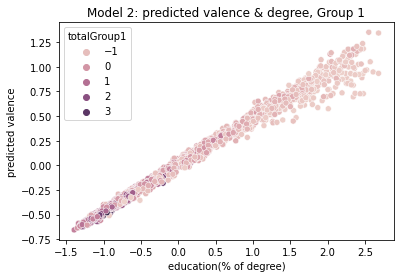

In [79]:
sns.scatterplot(x='percent_bachelorPlus', y='valence_predict', data=model_2_df, hue='totalGroup1')
plt.title('Model 2: predicted valence & degree, Group 1')
plt.xlabel('education(% of degree)')
plt.ylabel('predicted valence')
#plt.axhline(y= threshold, color='r', linestyle='--', lw=2)


Text(0, 0.5, 'predicted valence')

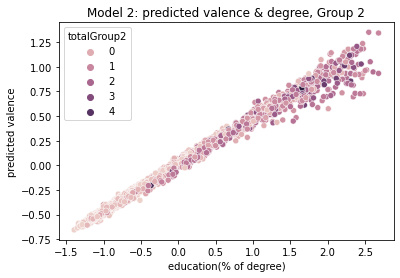

In [80]:
sns.scatterplot(x='percent_bachelorPlus', y='valence_predict', data=model_2_df, hue='totalGroup2')
plt.title('Model 2: predicted valence & degree, Group 2')
plt.xlabel('education(% of degree)')
plt.ylabel('predicted valence')
#plt.axhline(y= threshold, color='r', linestyle='--', lw=2)


Text(0, 0.5, 'predicted valence')

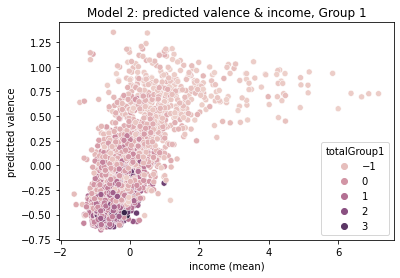

In [81]:
sns.scatterplot(x='households_meanIncome', y='valence_predict', data=model_2_df, hue='totalGroup1')
plt.title('Model 2: predicted valence & income, Group 1')
plt.xlabel('income (mean)')
plt.ylabel('predicted valence')
#plt.axhline(y= threshold, color='r', linestyle='--', lw=2)


Text(0, 0.5, 'predicted valence')

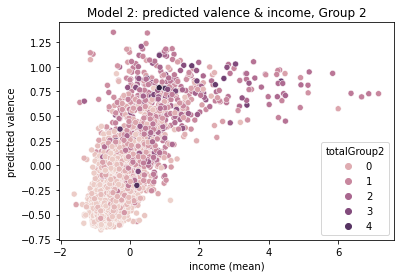

In [82]:
sns.scatterplot(x='households_meanIncome', y='valence_predict', data=model_2_df, hue='totalGroup2')
plt.title('Model 2: predicted valence & income, Group 2')
plt.xlabel('income (mean)')
plt.ylabel('predicted valence')
#plt.axhline(y= threshold, color='r', linestyle='--', lw=2)


## 4. Fair Model

In [83]:
def gen_latent_fast(df0, prot_col, tar_col):
    """
    generate a representation for target column which is independent from
    any columns in prot_col
    df0: a data frame
    prot_col: list of strings, the protected columns
    tar_col: string, the target (outcome) column
    """
    
    df = df0.copy()
    for column in df.columns:
        df[column] = df[column] - df[column].mean()
    df_protect = df[prot_col]
    dfv_protect = df_protect.values
    dfv_target = df[tar_col].values
    base_protect = scipy.linalg.orth(dfv_protect)
    for i in range(base_protect.shape[1]):
        #print(base_protect[:,i].shape)
        dfv_target = dfv_target - np.inner(dfv_target, base_protect[:,i])*base_protect[:,i]
    return dfv_target

model_fast = gen_latent_fast(df_scaler,['totalGroup1','totalGroup2'],'meanvalence')

df_model_fast = pd.DataFrame(model_fast,columns=['valence_unbiased'])
print(df_model_fast)




      valence_unbiased
0            -0.051823
1             0.629123
2            -1.835140
3            -1.577373
4            -1.973122
...                ...
2105         -0.133060
2106         -0.157032
2107         -1.198720
2108         -0.265126
2109         -0.399303

[2110 rows x 1 columns]


In [84]:
df_drop_meanvalence = df_scaler.drop('meanvalence',axis=1)
#df_drop_meanvalence

model_df_fast = pd.concat([df_model_fast, df_drop_meanvalence], axis=1)
model_df_fast.columns =['valence_unbiased_fast','totalGroup1', 'totalGroup2', 'percent_bachelorPlus', 'households_meanIncome']
model_df_fast



,valence_unbiased_fast,totalGroup1,totalGroup2,percent_bachelorPlus,households_meanIncome
0,-0.051823,-0.331174,1.337270,-0.456639,-0.217651
1,0.629123,-1.187497,1.192530,-0.078692,0.977701
2,-1.835140,0.752895,1.095031,-0.592312,-0.552870
3,-1.577373,-1.000745,0.383390,-0.437257,-0.613180
4,-1.973122,-1.131927,2.138369,0.105436,0.292354
...,...,...,...,...,...
2105,-0.133060,-0.792131,1.748374,1.500933,2.300908
2106,-0.157032,-0.728362,2.390660,1.292577,1.945841
2107,-1.198720,-1.439839,-0.895152,1.748052,-0.388309
2108,-0.265126,-1.357850,-0.752422,0.086054,0.903479


In [85]:
#Plot correlation matrix
numeric_attribute = ['valence_unbiased_fast','totalGroup1', 'totalGroup2', 'percent_bachelorPlus', 'households_meanIncome']

corr_numeric = model_df_fast[numeric_attribute].corr()
corr_numeric.style.background_gradient(cmap='YlGnBu')


,valence_unbiased_fast,totalGroup1,totalGroup2,percent_bachelorPlus,households_meanIncome
valence_unbiased_fast,1.000000,-0.000000,0.000000,0.131062,0.065334
totalGroup1,-0.000000,1.000000,-0.503950,-0.729305,-0.507290
totalGroup2,0.000000,-0.503950,1.000000,0.726215,0.585684
percent_bachelorPlus,0.131062,-0.729305,0.726215,1.000000,0.752844
households_meanIncome,0.065334,-0.507290,0.585684,0.752844,1.000000


Text(0, 0.5, 'unbiased valence')

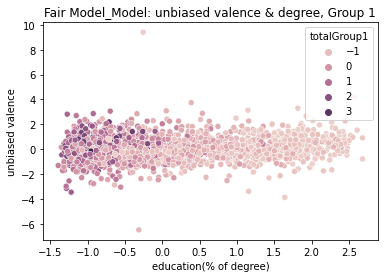

In [86]:
sns.scatterplot(x='percent_bachelorPlus', y='valence_unbiased_fast', data= model_df_fast, hue='totalGroup1')
plt.title('Fair Model_Model: unbiased valence & degree, Group 1')
plt.xlabel('education(% of degree)')
plt.ylabel('unbiased valence')


Text(0, 0.5, 'unbiased valence')

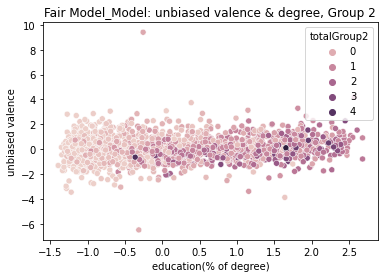

In [87]:
sns.scatterplot(x='percent_bachelorPlus', y='valence_unbiased_fast', data= model_df_fast, hue='totalGroup2')
plt.title('Fair Model_Model: unbiased valence & degree, Group 2')
plt.xlabel('education(% of degree)')
plt.ylabel('unbiased valence')


Text(0, 0.5, 'unbiased valence')

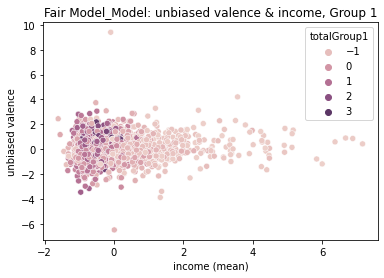

In [88]:
sns.scatterplot(x='households_meanIncome', y='valence_unbiased_fast', data=model_df_fast, hue='totalGroup1')
plt.title('Fair Model_Model: unbiased valence & income, Group 1')
plt.xlabel('income (mean)')
plt.ylabel('unbiased valence')


Text(0, 0.5, 'unbiased valence')

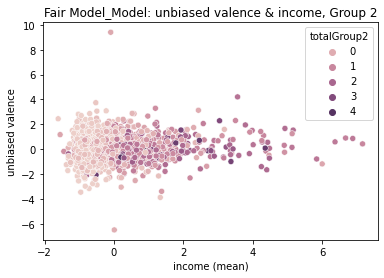

In [89]:
sns.scatterplot(x='households_meanIncome', y='valence_unbiased_fast', data=model_df_fast, hue='totalGroup2')
plt.title('Fair Model_Model: unbiased valence & income, Group 2')
plt.xlabel('income (mean)')
plt.ylabel('unbiased valence')
